# Image compression using linear algebra

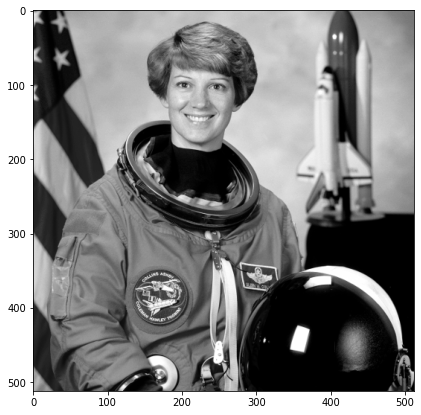

In [1]:
import numpy as np
from skimage.color import rgb2gray
from skimage.data import astronaut

import matplotlib.pyplot as plt

original = rgb2gray(astronaut())

plt.figure(figsize=(7, 7))
plt.imshow(original, cmap='gray')
plt.show()

In [2]:
patch_side = 32

patch_vectors = np.zeros(((512//patch_side)*(512//patch_side), patch_side*patch_side), dtype=original.dtype)
n = 0
for i in range(0, 512, patch_side):
  for j in range(0, 512, patch_side):
    patch_vectors[n, :] = original[i:i+patch_side, j:j+patch_side].ravel()
    n += 1

In [3]:
from sklearn.decomposition import PCA

model = PCA()
transformed_patch_vectors = model.fit_transform(patch_vectors)
# transformed_patch_vectors
transformed_patch_vectors[:, 200:] = 0
new_patch_vectors = model.inverse_transform(transformed_patch_vectors)
# plt.plot(model.explained_variance_)

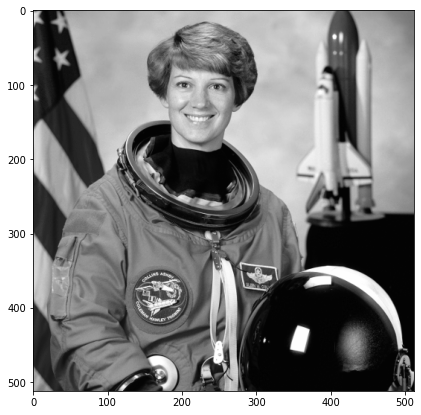

In [4]:
reconstruction = np.zeros(original.shape,  dtype=original.dtype)

n = 0
for i in range(0, 512, patch_side):
  for j in range(0, 512, patch_side):
    reconstruction[i:i+patch_side, j:j+patch_side] = new_patch_vectors[n, :].reshape((patch_side, patch_side))
    n += 1

plt.figure(figsize=(7, 7))
plt.imshow(reconstruction, cmap='gray')
plt.show()

In [5]:
import ipywidgets as widgets

def reconstruct(n_components):
  # print(n_components)
  data = transformed_patch_vectors.copy()
  data[:, n_components:] = 0
  new_patch_vectors = model.inverse_transform(data)
  reconstruction = np.zeros(original.shape,  dtype=original.dtype)
  n = 0
  for i in range(0, 512, patch_side):
    for j in range(0, 512, patch_side):
      reconstruction[i:i+patch_side, j:j+patch_side] = new_patch_vectors[n, :].reshape((patch_side, patch_side))
      n += 1
  # plt.figure(figsize=(5, 5), dpi=100)
  plt.figure(figsize=(7, 7))
  plt.imshow(reconstruction, cmap='gray')
  plt.show()
  # plt.axis('equal')
  # plt.title("Squared error: %.1f" % e)
  # plt.show()
  print("Size after compression %.1f%%" % (100*(data[:, :n_components].nbytes + 
                                     model.components_[:, :n_components].nbytes + 
                                     model.mean_[:n_components].nbytes) / 
                                original.nbytes))

widgets.interact(reconstruct, n_components=widgets.IntSlider(min=1, max=80, step=1, value=80));


interactive(children=(IntSlider(value=80, description='n_components', max=80, min=1), Output()), _dom_classes=…